# sample from a non-uniform distribution
We simulate the random locations of gas molecules in a vessel. 
The vessel is divided vertically into three parts.

Due to gravitation, a particle is in the lower part with higher probability
and in the upper part with less probability.
For each instantaneous time, we calculate the empirical distribution

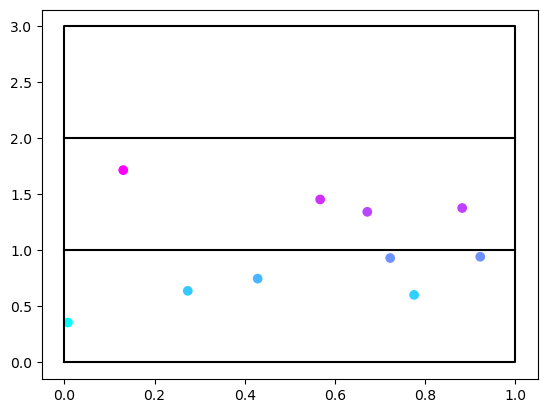

In [1]:
import matplotlib.pyplot as plt
from numpy import random
import numpy as np 

def generate_random_y():
    while True:
        y = random.rand()*3
        x = random.rand()
        if y<3*x:
          return y
            
plt.plot([0, 0, 1, 1, 0],[0, 3, 3, 0, 0], color = 'black')
plt.plot([0,1],[1,1], color='black')
plt.plot([0,1], [2,2], color='black')

N = 10   # number of particles
xs = [random.rand() for _ in range(N)]
ys = [generate_random_y() for _ in range(N)]
plt.scatter(xs,ys, c=ys, cmap='cool')
plt.show()


In [2]:
# count the number of points in each parts
n1 = sum([1 if x<=1 else 0 for x in ys]) 
n2 = sum([1 if x> 1 and x<=2 else 0 for x in ys]) 
n3 = sum([1 if x>=2 else 0 for x in ys])
print(f"empirical distribution is ({n1/N},{n2/N}, {n3/N})")

empirical distribution is (0.6,0.4, 0.0)


# Plot empirical distributions graphically in a probability simplex

We can see that when the number of particles increases, the empirical distribution is more concentrated around the source distribution.

In [3]:
N = 10   # number of particles
no_of_points = 100
p1 = []
p2 = []
p3 = []
for _ in range(no_of_points):
    ys = [generate_random_y() for _ in range(N)]
    n1 = sum([1 if y<=1 else 0 for y in ys]) 
    n2 = sum([1 if y>1 and y<=2 else 0 for y in ys]) 
    n3 = sum([1 if y>=2 else 0 for y in ys])
    p1.append(n1/N)
    p2.append(n2/N)
    p3.append(n3/N)

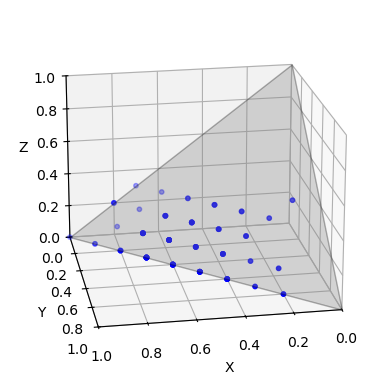

In [4]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import axes3d

# vertices of a triangle
x_coords = np.array([1, 0, 0])
y_coords = np.array([0, 1, 0])
z_coords = np.array([0, 0, 1])
verts = [list(zip(x_coords, y_coords, z_coords))]

#  Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# draw triangle
srf = Poly3DCollection(verts, alpha=0.3, facecolor='grey', edgecolor='black')
# draw points
ax.scatter(p1, p2, p3, c='b', marker='o', s=10) 
ax.add_collection3d(srf)
ax.view_init(elev=20., azim=80)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()